<a href="https://colab.research.google.com/github/abnassiri/abnassiri/blob/main/03_01_25_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.activations, tensorflow.keras.optimizers, tensorflow.keras.losses

In [4]:
# Load the data
data = pd.read_csv('ACI-IoT-2023.csv')

In [5]:
# Initial data inspection
print(data.columns)
print(data.describe())
print(data.isna().sum())
print(data.info())
print(len(data.columns))

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [6]:
# Convert all non-numeric columns to string
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str)

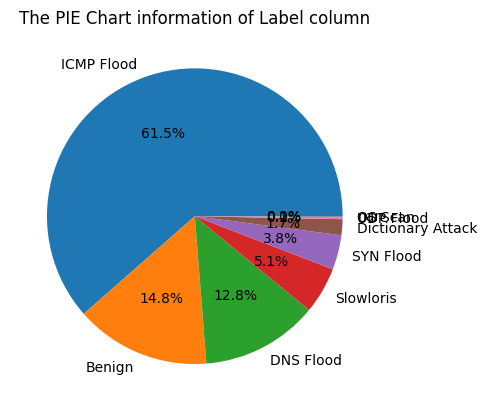

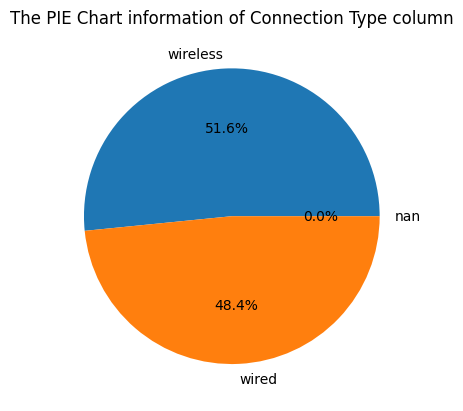

In [7]:
# Plot pie charts for categorical columns
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts()) <= 10:
        val = data[i].value_counts().values
        index = data[i].value_counts().index
        plt.pie(val, labels=index, autopct='%1.1f%%')
        plt.title(f'The PIE Chart information of {i} column')
        plt.show()

In [8]:
# Display value counts for categorical columns
for i in data.select_dtypes(include='object').columns.values:
    print(data[i].value_counts())
    print("--------------------------------")

Flow ID
192.168.1.172-230.0.0.1-51504-6666-17          960
8.6.0.1-8.0.6.4-0-0-0                          943
192.168.1.172-224.0.0.251-5353-5353-17         896
192.168.1.183-255.255.255.255-49154-6667-17    617
192.168.1.7-224.0.0.251-5353-5353-17           543
                                              ... 
159.96.168.20-192.168.1.212-0-0-0                1
181.153.30.92-192.168.1.212-0-0-0                1
193.98.47.116-192.168.1.212-0-0-0                1
111.226.2.192-192.168.1.212-0-0-0                1
152.131.203.70-192.168.1.212-0-0-0               1
Name: count, Length: 299537, dtype: int64
--------------------------------
Src IP
192.168.1.211      83073
192.168.1.212      29051
192.168.1.45       22122
192.168.1.168       7912
192.168.1.25        6979
                   ...  
123.153.128.214        1
223.138.27.85          1
197.241.81.57          1
181.46.107.238         1
109.38.25.37           1
Name: count, Length: 158412, dtype: int64
--------------------------------

In [10]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 31.2 MB/s eta 0:00:00


In [12]:
import plotly.express as px
fig = px.pie(data, names='Label', title='Distribution of Label')
fig.show()

class imbalance issue - this can cause the machine learning model to result in biased results

In [13]:
# Encode categorical features
lab = LabelEncoder()
for i in data.select_dtypes(include='object').columns.values:
    data[i] = lab.fit_transform(data[i])

In [15]:
# Train-test split
# Train-test split
# Assuming 'Label' is the target variable and the rest are features:
X = data.drop('Label', axis=1)  # Define X as features
Y = data['Label']  # Define Y as the target variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
X = data.drop(['Label', 'Connection Type'], axis=1)
y_label = data['Label']
y_type = data['Connection Type']

In [17]:
X_train, X_test, y_train_label, y_test_label = train_test_split(X, y_label, test_size=0.2, random_state=42)

In [18]:
print("Checking for infinity values in X_train...")
print(np.isinf(X_train).sum())
print("Checking for extremely large values in X_train...")
print(np.max(X_train, axis=0))

Checking for infinity values in X_train...
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
Dst Port      0
             ..
Active Min    0
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Length: 83, dtype: int64
Checking for extremely large values in X_train...
Flow ID       2.995360e+05
Src IP        1.584110e+05
Src Port      6.550800e+04
Dst IP        8.709100e+04
Dst Port      6.553400e+04
                  ...     
Active Min    5.281509e+07
Idle Mean     1.698940e+15
Idle Std      1.201332e+15
Idle Max      1.698940e+15
Idle Min      1.698940e+15
Length: 83, dtype: float64


In [19]:
# Cap extreme values to the 99th percentile for each column
for col in ['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']:
    upper_limit = X_train[col].quantile(0.99)
    X_train[col] = X_train[col].clip(upper=upper_limit)
print("Extreme values capped to the 99th percentile.")

Extreme values capped to the 99th percentile.


In [20]:
# Remove rows where values exceed a threshold
threshold = 1e15  # Example threshold for extremely large values
for col in ['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']:
    X_train = X_train[X_train[col] < threshold]
print("Rows with extremely large values removed.")

Rows with extremely large values removed.


In [26]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



587/587 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5697 - loss: 64435.2930
Epoch 2/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6012 - loss: 1412.5321
Epoch 3/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5192 - loss: 1672.0876
Epoch 4/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6382 - loss: 1157.1215
Epoch 5/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6506 - loss: 929.5291
Epoch 6/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6481 - loss: 796.7785
Epoch 7/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6443 - loss: 963.4028
Epoch 8/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6463 - loss: 651.4290
Epoch 9/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6461 - loss: 556.3452
Epoch 10/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6576 - loss: 459.1512
Epoch 11/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6486 - loss: 326.3443
Epoch 12/50
587/587 ━━━━━━━━━━━━━━━━

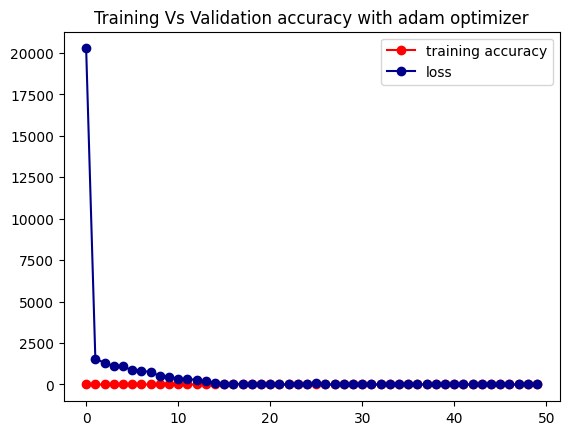

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



587/587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4273 - loss: 56027.6211
Epoch 2/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6137 - loss: 2.1684
Epoch 3/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6125 - loss: 1.4058
Epoch 4/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6151 - loss: 1.3074
Epoch 5/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6151 - loss: 1.2662
Epoch 6/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6147 - loss: 1.2483
Epoch 7/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6137 - loss: 1.2343
Epoch 8/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6152 - loss: 1.2260
Epoch 9/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6147 - loss: 1.2223
Epoch 10/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6138 - loss: 1.2206
Epoch 11/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6132 - loss: 1.2189
Epoch 12/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accu

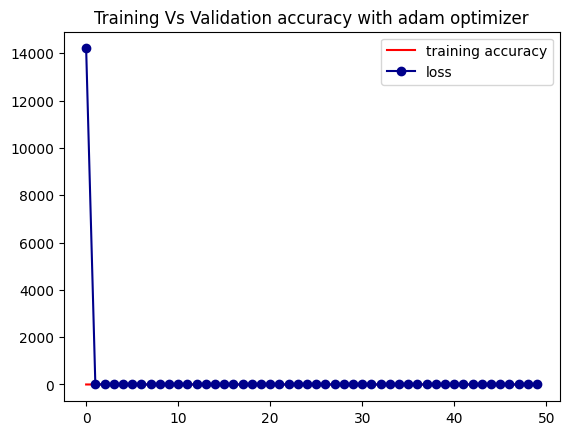

In [30]:
# Deep Learning Model
# Define the important features for the model
# Deep Learning Model
# Define the important features for the model
important_features = ['Src Port', 'Dst Port', 'Protocol',
        'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min'] #Fixed syntax error here
x = data[important_features]
y = pd.get_dummies(data['Label'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = Sequential()
models.add(Dense(units=x.shape[1], input_dim=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=y.shape[1], activation=tensorflow.keras.activations.softmax))

models.compile(optimizer='adam', loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])
hist = models.fit(x_train, y_train, batch_size=500, epochs=50)

plt.plot(hist.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.title('Training Vs Validation accuracy with adam optimizer')
plt.legend()
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = Sequential()
models.add(Dense(units=x.shape[1], input_dim=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=x.shape[1], activation=tensorflow.keras.activations.relu))
models.add(Dense(units=y.shape[1], activation=tensorflow.keras.activations.softmax))

models.compile(optimizer='adam', loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])
hist = models.fit(x_train, y_train, batch_size=500, epochs=50)

plt.plot(hist.history['accuracy'], label='training accuracy', linestyle='-', color='red') # Changed marker to linestyle
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.title('Training Vs Validation accuracy with adam optimizer')
plt.legend()
plt.show()